<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/02_PyCaret_for_Classification_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Classification**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>** 

2. Documentation on Pycaret-Classification: **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.3'

---
# **1. Classification: Basics**
---
### **1.1 Get the list of datasets available in pycaret (55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "diabetes" dataset**
---

In [4]:
diabetesDataSet = get_data("diabetes")    # SN is 7

# This is binary classification dataset. 
# The values in "Class variable" have two (binary) values.

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
### **1.3 Download the "diabetes" dataset to local system** 
---

In [5]:
diabetesDataSet.to_csv("diabetesDataSet.csv")
from google.colab import files
#files.download('diabetesDataSet.csv')            # Uncomment this line       

---
### **1.4 "Parameter setting"  for all classification models**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [6]:
from pycaret.classification import *
s = setup(data=diabetesDataSet, target='Class variable', train_size = 0.7, data_split_shuffle = False, silent=True)


,Description,Value
0,session_id,5617
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


---
### **1.5 "Run and Compare" the model performance**
---

In [7]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7525,0.7912,0.5401,0.7003,0.6048,0.4295,0.4406,0.525
ridge,Ridge Classifier,0.7507,0.0000,0.5348,0.6997,0.6000,0.4242,0.4366,0.014
lda,Linear Discriminant Analysis,0.7507,0.7885,0.5401,0.6958,0.6023,0.4256,0.4368,0.017
rf,Random Forest Classifier,0.7490,0.8005,0.5556,0.6857,0.6095,0.4278,0.4361,0.522
et,Extra Trees Classifier,0.7340,0.7743,0.4871,0.6712,0.5611,0.3781,0.3900,0.466
gbc,Gradient Boosting Classifier,0.7228,0.7962,0.5503,0.6392,0.5853,0.3792,0.3861,0.129
lightgbm,Light Gradient Boosting Machine,0.7135,0.7716,0.5611,0.6069,0.5804,0.3641,0.3664,0.095
ada,Ada Boost Classifier,0.7116,0.7652,0.5713,0.6016,0.5828,0.3632,0.3659,0.110
knn,K Neighbors Classifier,0.7079,0.7218,0.5345,0.6134,0.5642,0.3471,0.3537,0.120
dt,Decision Tree Classifier,0.6706,0.6349,0.5140,0.5332,0.5202,0.2707,0.2726,0.017


---
### **1.6 "Three line of code" for model comparison for "Cancer" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.classification import *

cancerDataSet = get_data("cancer")
s = setup(data = cancerDataSet, target='Class', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9708,0.9941,0.9647,0.9548,0.9591,0.9364,0.9372,0.481
lr,Logistic Regression,0.9666,0.9943,0.9471,0.9584,0.9522,0.9265,0.9271,0.026
svm,SVM - Linear Kernel,0.9666,0.0000,0.9529,0.9538,0.9525,0.9268,0.9278,0.018
et,Extra Trees Classifier,0.9666,0.9940,0.9529,0.9539,0.9527,0.9269,0.9277,0.469
nb,Naive Bayes,0.9645,0.9833,0.9412,0.9597,0.9491,0.9218,0.9233,0.018
ridge,Ridge Classifier,0.9645,0.0000,0.9412,0.9591,0.9493,0.9221,0.9230,0.017
lda,Linear Discriminant Analysis,0.9645,0.9905,0.9471,0.9538,0.9495,0.9222,0.9233,0.025
lightgbm,Light Gradient Boosting Machine,0.9625,0.9928,0.9529,0.9420,0.9468,0.9178,0.9186,0.047
ada,Ada Boost Classifier,0.9604,0.9882,0.9412,0.9482,0.9434,0.9130,0.9144,0.118
gbc,Gradient Boosting Classifier,0.9561,0.9932,0.9412,0.9367,0.9377,0.9039,0.9053,0.126


---
### **1.7 "Three line of code" for model comparison for "Heart Disease" dataset**
---



In [9]:
from pycaret.datasets import get_data
from pycaret.classification import *

heartDiseaseDataSet = get_data("heart_disease")
s = setup(data = heartDiseaseDataSet, target='Disease', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8509,0.8943,0.8222,0.8675,0.8362,0.6999,0.7101,0.170
ridge,Ridge Classifier,0.8401,0.0000,0.8000,0.8657,0.8240,0.6777,0.6883,0.014
rf,Random Forest Classifier,0.8348,0.8796,0.8000,0.8543,0.8209,0.6676,0.6747,0.467
lda,Linear Discriminant Analysis,0.8345,0.8841,0.8000,0.8568,0.8193,0.6666,0.6776,0.017
lightgbm,Light Gradient Boosting Machine,0.8088,0.8783,0.7889,0.8101,0.7940,0.6158,0.6221,0.031
nb,Naive Bayes,0.7980,0.8526,0.7556,0.8275,0.7757,0.5930,0.6110,0.016
gbc,Gradient Boosting Classifier,0.7977,0.8314,0.7556,0.8139,0.7775,0.5925,0.6009,0.084
et,Extra Trees Classifier,0.7871,0.8677,0.7333,0.8037,0.7628,0.5715,0.5778,0.463
dt,Decision Tree Classifier,0.7658,0.7650,0.7556,0.7550,0.7523,0.5303,0.5346,0.015
ada,Ada Boost Classifier,0.7339,0.7951,0.6667,0.7582,0.7026,0.4636,0.4735,0.096


---
# **2. Classification: working with user dataset**
---
### **2.1 Uploading "user file" from user system**

In [10]:
from google.colab import files
#files.upload()                     # Uncomment this line

---
### **2.2 "Read" the uploaded file**
---

In [11]:
import pandas as pd
#myDataSet = pd.read_csv('Sample5 - Brest Cancer.csv')        # Uncomment this line and replace the file name that read in above step
#myDataSet.head()                                             # Uncomment this line

---
### **2.3 "Compare" the model performance**
---

In [12]:
from pycaret.classification import *

#s = setup(data = myDataSet, target='Cancer', silent=True)               # Uncomment this line
#cm = compare_models()                                                 # Uncomment this line

---
### **2.4 "Three line of code" for model comparison for "user dataset**

##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [13]:
from pycaret.classification import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")                          # Uncomment this line
#s = setup(data = myDataSet, target='cancer', silent=True)      # Uncomment this line
#cm = compare_models()                                          # Uncomment this line

---
# **3. Classification: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [14]:
s = setup(data=diabetesDataSet, target='Class variable', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7672,0.8113,0.5749,0.7044,0.6313,0.4638,0.4703,0.027
ridge,Ridge Classifier,0.7579,0.0000,0.5538,0.6903,0.6130,0.4401,0.4469,0.014
lda,Linear Discriminant Analysis,0.7560,0.8081,0.5594,0.6850,0.6139,0.4384,0.4448,0.017
rf,Random Forest Classifier,0.7431,0.7958,0.5161,0.6723,0.5803,0.4004,0.4098,0.514
ada,Ada Boost Classifier,0.7376,0.7819,0.5699,0.6394,0.5994,0.4058,0.4096,0.114
gbc,Gradient Boosting Classifier,0.7373,0.7936,0.5585,0.6377,0.5919,0.4005,0.4048,0.128
et,Extra Trees Classifier,0.7320,0.7811,0.5278,0.6403,0.5759,0.3834,0.3891,0.466
knn,K Neighbors Classifier,0.7265,0.7358,0.4950,0.6429,0.5567,0.3637,0.3720,0.118
lightgbm,Light Gradient Boosting Machine,0.7245,0.7831,0.5588,0.6232,0.5852,0.3801,0.3843,0.056
dt,Decision Tree Classifier,0.6855,0.6531,0.5482,0.5595,0.5460,0.3076,0.3136,0.016


---
### **3.2 Model performance using "Feature Selection"**
---

In [15]:
s = setup(data=diabetesDataSet, target='Class variable', feature_selection = True, feature_selection_method = 'classic', feature_selection_threshold = 0.8, silent=True)
cm = compare_models()

#feature_selection_method = {classic, boruta}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7652,0.8180,0.5614,0.7148,0.6246,0.4578,0.4678,0.244
gbc,Gradient Boosting Classifier,0.7597,0.8236,0.5936,0.6829,0.6311,0.4549,0.4602,0.132
ridge,Ridge Classifier,0.7578,0.0000,0.5450,0.7049,0.6099,0.4390,0.4496,0.015
rf,Random Forest Classifier,0.7559,0.8129,0.5611,0.6847,0.6124,0.4381,0.4452,0.512
lda,Linear Discriminant Analysis,0.7559,0.8149,0.5503,0.6980,0.6125,0.4377,0.4466,0.017
ada,Ada Boost Classifier,0.7485,0.7974,0.6152,0.6548,0.6290,0.4403,0.4453,0.113
lightgbm,Light Gradient Boosting Machine,0.7372,0.7954,0.5988,0.6398,0.6149,0.4165,0.4200,0.050
et,Extra Trees Classifier,0.7319,0.7813,0.4968,0.6639,0.5620,0.3751,0.3876,0.465
knn,K Neighbors Classifier,0.7093,0.7182,0.5246,0.6088,0.5552,0.3432,0.3506,0.119
nb,Naive Bayes,0.7020,0.7567,0.2936,0.6741,0.4066,0.2457,0.2854,0.016


---
### **3.3 Model performance using "Outlier Removal"**
---

In [16]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7961,0.8323,0.5997,0.7576,0.6603,0.5196,0.5316,0.516
gbc,Gradient Boosting Classifier,0.7804,0.8264,0.6170,0.7081,0.6562,0.4964,0.5012,0.122
lda,Linear Discriminant Analysis,0.7725,0.8093,0.5716,0.7127,0.6248,0.4678,0.4786,0.017
lr,Logistic Regression,0.7706,0.8110,0.5716,0.7118,0.6229,0.4643,0.4762,0.233
ridge,Ridge Classifier,0.7706,0.0000,0.5598,0.7129,0.6156,0.4594,0.4720,0.014
et,Extra Trees Classifier,0.7706,0.8127,0.5748,0.6795,0.6167,0.4580,0.4637,0.468
lightgbm,Light Gradient Boosting Machine,0.7706,0.8168,0.6281,0.6890,0.6478,0.4795,0.4869,0.047
ada,Ada Boost Classifier,0.7588,0.8037,0.6003,0.6609,0.6239,0.4489,0.4530,0.112
nb,Naive Bayes,0.7235,0.7369,0.5598,0.6135,0.5627,0.3676,0.3802,0.016
knn,K Neighbors Classifier,0.7196,0.7357,0.5379,0.6120,0.5693,0.3628,0.3673,0.120


---
### **3.4 Model performance using "Transformation"**
---

In [17]:
s = setup(data=diabetesDataSet, target='Class variable', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7541,0.8096,0.5421,0.7102,0.6073,0.4343,0.4479,0.025
ridge,Ridge Classifier,0.7504,0.0000,0.5263,0.7101,0.5987,0.4237,0.4378,0.014
lda,Linear Discriminant Analysis,0.7485,0.8003,0.5263,0.7041,0.5953,0.4194,0.4334,0.017
et,Extra Trees Classifier,0.7391,0.7509,0.4789,0.6823,0.5535,0.3831,0.3981,0.461
gbc,Gradient Boosting Classifier,0.7376,0.7976,0.5632,0.6549,0.6021,0.4088,0.4138,0.122
lightgbm,Light Gradient Boosting Machine,0.7318,0.7858,0.5895,0.6387,0.6055,0.4051,0.4108,0.049
rf,Random Forest Classifier,0.7281,0.7829,0.5105,0.6477,0.5653,0.3741,0.3823,0.518
knn,K Neighbors Classifier,0.7226,0.7140,0.4842,0.6444,0.5458,0.3551,0.3657,0.118
svm,SVM - Linear Kernel,0.7209,0.0000,0.5316,0.6501,0.5682,0.3688,0.3835,0.019
ada,Ada Boost Classifier,0.7187,0.7709,0.5684,0.6143,0.5856,0.3748,0.3782,0.109


---
### **3.5 Model performance using "PCA"**
---

In [18]:
s = setup(data=diabetesDataSet, target='Class variable', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7523,0.0000,0.5140,0.7044,0.5920,0.4213,0.4332,0.014
qda,Quadratic Discriminant Analysis,0.7501,0.7928,0.5187,0.6999,0.5934,0.4190,0.4304,0.018
rf,Random Forest Classifier,0.7486,0.7883,0.5617,0.6848,0.6095,0.4279,0.4379,0.519
lda,Linear Discriminant Analysis,0.7486,0.7985,0.5193,0.6933,0.5914,0.4159,0.4263,0.015
ada,Ada Boost Classifier,0.7469,0.7650,0.5819,0.6661,0.6188,0.4308,0.4348,0.110
lr,Logistic Regression,0.7449,0.7999,0.5246,0.6849,0.5912,0.4109,0.4205,0.022
nb,Naive Bayes,0.7447,0.7836,0.5190,0.6787,0.5873,0.4079,0.4159,0.017
lightgbm,Light Gradient Boosting Machine,0.7392,0.7891,0.5509,0.6672,0.5982,0.4081,0.4162,0.052
gbc,Gradient Boosting Classifier,0.7262,0.7778,0.5289,0.6419,0.5769,0.3776,0.3836,0.121
et,Extra Trees Classifier,0.7244,0.7668,0.4874,0.6471,0.5534,0.3605,0.3696,0.466


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [19]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7647,0.8293,0.5863,0.7183,0.6362,0.4662,0.4776,0.027
ridge,Ridge Classifier,0.7608,0.0000,0.5860,0.7055,0.6323,0.4585,0.4681,0.015
lda,Linear Discriminant Analysis,0.7608,0.8237,0.6026,0.6956,0.6387,0.4625,0.4698,0.016
rf,Random Forest Classifier,0.7588,0.8131,0.5696,0.7054,0.6246,0.4507,0.4605,0.518
ada,Ada Boost Classifier,0.7510,0.7940,0.6076,0.6790,0.6295,0.4444,0.4549,0.113
et,Extra Trees Classifier,0.7510,0.8098,0.5412,0.7068,0.6046,0.4283,0.4417,0.467
knn,K Neighbors Classifier,0.7431,0.7560,0.5807,0.6644,0.6138,0.4241,0.4305,0.118
gbc,Gradient Boosting Classifier,0.7373,0.8087,0.5635,0.6543,0.5971,0.4058,0.4138,0.127
lightgbm,Light Gradient Boosting Machine,0.7333,0.7855,0.5909,0.6393,0.6066,0.4070,0.4131,0.047
svm,SVM - Linear Kernel,0.7275,0.0000,0.6026,0.6285,0.6123,0.4030,0.4055,0.018


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [20]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7510,0.8118,0.5373,0.6918,0.5991,0.4222,0.4334,0.026
rf,Random Forest Classifier,0.7510,0.8094,0.5147,0.6996,0.5860,0.4142,0.4289,0.516
et,Extra Trees Classifier,0.7412,0.7931,0.4918,0.6747,0.5639,0.3875,0.3997,0.465
gbc,Gradient Boosting Classifier,0.7373,0.8116,0.5373,0.6526,0.5856,0.3957,0.4026,0.123
ridge,Ridge Classifier,0.7353,0.0000,0.4971,0.6774,0.5652,0.3806,0.3954,0.014
lda,Linear Discriminant Analysis,0.7333,0.8069,0.5029,0.6689,0.5670,0.3791,0.3920,0.017
ada,Ada Boost Classifier,0.7196,0.7881,0.5268,0.6163,0.5600,0.3580,0.3656,0.112
svm,SVM - Linear Kernel,0.7157,0.0000,0.5660,0.6100,0.5688,0.3622,0.3745,0.019
lightgbm,Light Gradient Boosting Machine,0.7118,0.7856,0.5327,0.5964,0.5570,0.3460,0.3508,0.050
knn,K Neighbors Classifier,0.7078,0.7468,0.4621,0.6039,0.5189,0.3149,0.3236,0.120


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html"> Click Here</a>** for more

---
# **4. Classification: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [21]:
from pycaret.datasets import get_data
from pycaret.classification import *

diabetesDataSet = get_data("diabetes")
s = setup(data=diabetesDataSet, target='Class variable', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.8406,0.5789,0.6111,0.5946,0.3836,0.3839
1,0.6481,0.6857,0.4211,0.5000,0.4571,0.1997,0.2013
2,0.6667,0.7855,0.4444,0.5000,0.4706,0.2286,0.2294
3,0.8148,0.8634,0.5556,0.8333,0.6667,0.5455,0.5669
4,0.7407,0.7747,0.5556,0.6250,0.5882,0.4000,0.4015
5,0.7037,0.7515,0.3889,0.5833,0.4667,0.2727,0.2835
6,0.8333,0.9205,0.8889,0.6957,0.7805,0.6494,0.6620
7,0.8491,0.8548,0.6111,0.9167,0.7333,0.6339,0.6592
8,0.7170,0.8159,0.5000,0.6000,0.5455,0.3424,0.3454
9,0.7358,0.8135,0.4444,0.6667,0.5333,0.3592,0.3736


---
### **4.2 Other available classification models**
---
-	'ada' -	Ada Boost Classifier
-	'dt' -	Decision Tree Classifier
-	'et' -	Extra Trees Classifier
-	'gbc' -	Gradient Boosting Classifier
-	'knn' -	K Neighbors Classifier
-	'lightgbm' -	Light Gradient Boosting Machine
-	'lda' -	Linear Discriminant Analysis
-	'lr' -	Logistic Regression
-	'nb' -	Naive Bayes
-	'qda' -	Quadratic Discriminant Analysis
-	'rf' -	Random Forest Classifier
-	'ridge' -	Ridge Classifier
-	'svm' -	SVM - Linear Kernel

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.create_model"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [22]:
# Select top 10 rows from diabetes dataset
newDataSet = get_data("diabetes").iloc[:10]

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Make prediction on "new unseen dataset"**

In [23]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.80
1,1,85,66,29,0,26.6,0.351,31,0,0,0.92
2,8,183,64,0,0,23.3,0.672,32,1,0,0.55
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.93
5,5,116,74,0,0,25.6,0.201,30,0,0,0.97
6,3,78,50,32,88,31.0,0.248,26,1,0,0.84
7,10,115,0,0,0,35.3,0.134,29,0,0,0.72
8,2,197,70,45,543,30.5,0.158,53,1,1,0.84
9,8,125,96,0,0,0.0,0.232,54,1,0,0.89


---
### **4.5 "Save" the prediction results to csv** 
---

In [24]:
newPredictions.to_csv("NewPredictions.csv")
print("Result saved in NewPredictions.csv")

Result saved in NewPredictions.csv


---
### **4.6 Download the "result file" to user local system** 
---

In [25]:
from google.colab import files
#files.download('NewPredictions.csv')      # Uncomment this line

---
### **4.7 "Save" the trained model** 
---

In [26]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Successfully Saved


---
### **4.8 Download the "trained model file" to user local system** 
---

In [27]:
from google.colab import files
#files.download('rfModelFile.pkl')           # Uncomment this line

---
### **4.9  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.9.1 Upload the  "Trained Model"**


In [28]:
from google.colab import files
#files.upload()                    # Uncomment this line

---
### **4.9.2 Load the "Model"**
---

In [29]:
#rfModel = load_model('rfModelFile (1)')        # Uncomment this line

---
### **4.9.3 Make the prediction on "new unseen dataset"**
---

In [30]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.80
1,1,85,66,29,0,26.6,0.351,31,0,0,0.92
2,8,183,64,0,0,23.3,0.672,32,1,0,0.55
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.93
5,5,116,74,0,0,25.6,0.201,30,0,0,0.97
6,3,78,50,32,88,31.0,0.248,26,1,0,0.84
7,10,115,0,0,0,35.3,0.134,29,0,0,0.72
8,2,197,70,45,543,30.5,0.158,53,1,1,0.84
9,8,125,96,0,0,0.0,0.232,54,1,0,0.89


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**
*   Area Under the Curve         - 'auc'
*   Discrimination Threshold     - 'threshold'
*   Precision Recall Curve       - 'pr'
*   Confusion Matrix             - 'confusion_matrix'
*   Class Prediction Error       - 'error'
*   Classification Report        - 'class_report'
*   Decision Boundary            - 'boundary'
*   Recursive Feat. Selection    - 'rfe'
*   Learning Curve               - 'learning'
*   Manifold Learning            - 'manifold'
*   Calibration Curve            - 'calibration'
*   Validation Curve             - 'vc'
*   Dimension Learning           - 'dimension'
*   Feature Importance           - 'feature'
*   Model Hyperparameter         - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [31]:
rfModel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.8406,0.5789,0.6111,0.5946,0.3836,0.3839
1,0.6481,0.6857,0.4211,0.5000,0.4571,0.1997,0.2013
2,0.6667,0.7855,0.4444,0.5000,0.4706,0.2286,0.2294
3,0.8148,0.8634,0.5556,0.8333,0.6667,0.5455,0.5669
4,0.7407,0.7747,0.5556,0.6250,0.5882,0.4000,0.4015
5,0.7037,0.7515,0.3889,0.5833,0.4667,0.2727,0.2835
6,0.8333,0.9205,0.8889,0.6957,0.7805,0.6494,0.6620
7,0.8491,0.8548,0.6111,0.9167,0.7333,0.6339,0.6592
8,0.7170,0.8159,0.5000,0.6000,0.5455,0.3424,0.3454
9,0.7358,0.8135,0.4444,0.6667,0.5333,0.3592,0.3736


---
### **5.2 Create "Confusion Matrix"**
---

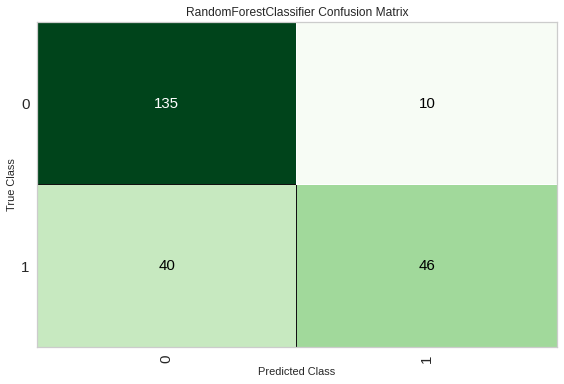

In [32]:
plot_model(rfModel, plot='confusion_matrix')

---
### **5.3 Plot the "learning curve"**
---

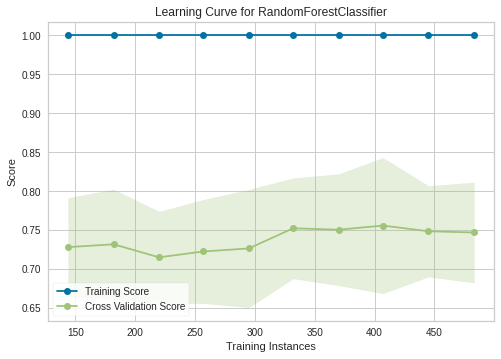

In [33]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "AUC Curve" (Area Under the Curve)**
---

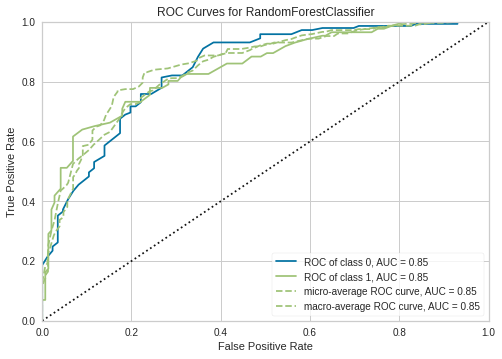

In [34]:
plot_model(rfModel, plot='auc')

---
### **5.5 Plot the "Decision Boundary"**
---

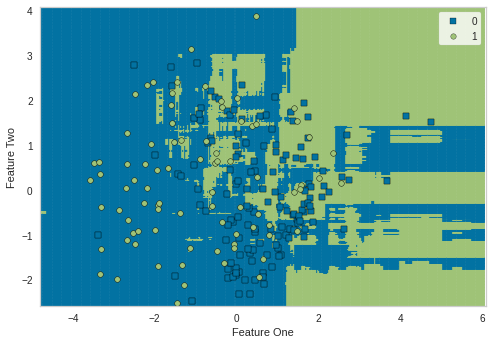

In [35]:
plot_model(rfModel, plot='boundary')

---
### **5.6 Get the model "parameters"**
---

In [36]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


---
### **5.7 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


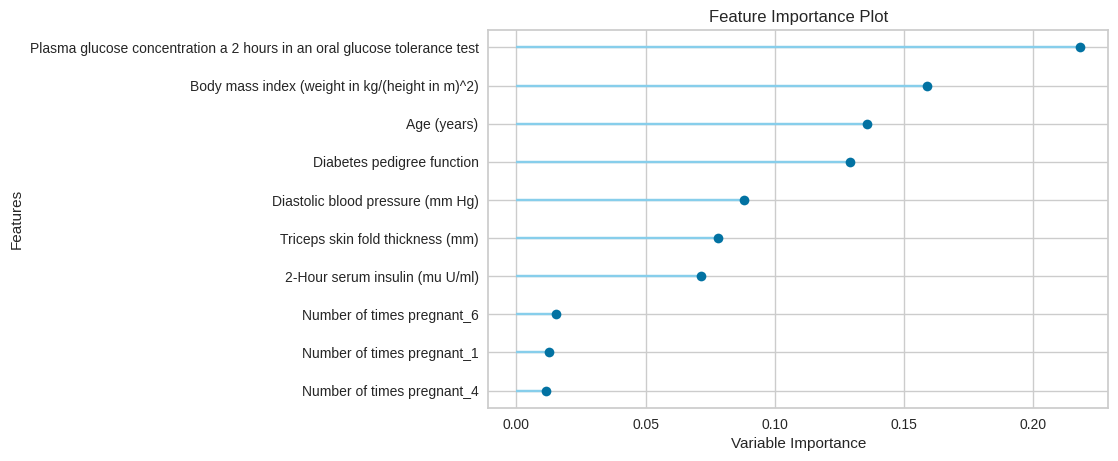

In [37]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

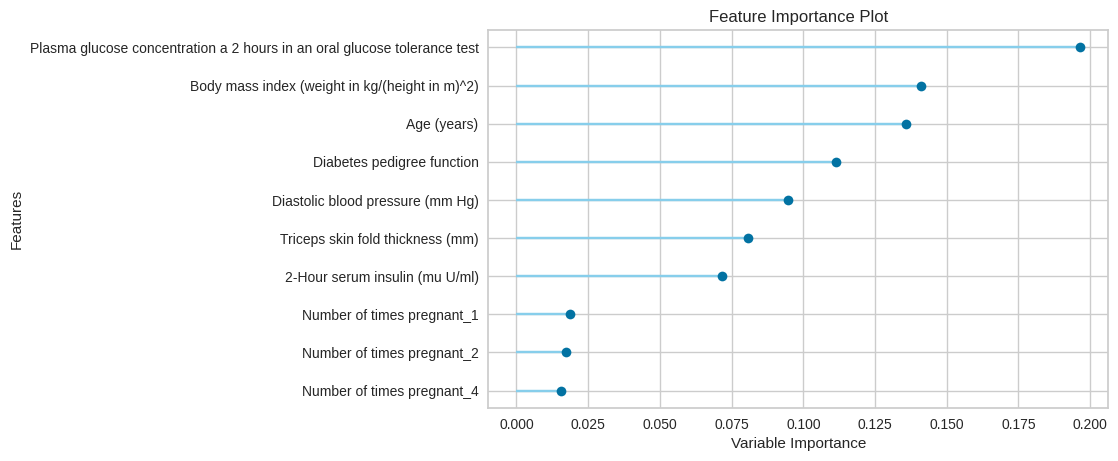

In [38]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

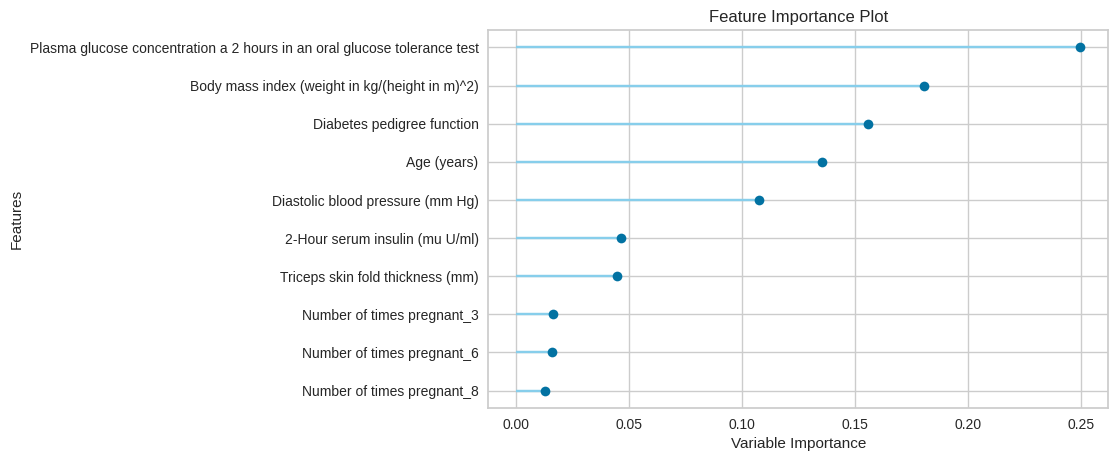

In [39]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [40]:
dtModel = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.6368,0.4737,0.5625,0.5143,0.2839,0.2862
1,0.5926,0.5534,0.4211,0.4211,0.4211,0.1068,0.1068
2,0.7222,0.6667,0.5000,0.6000,0.5455,0.3478,0.3508
3,0.6852,0.6250,0.4444,0.5333,0.4848,0.2609,0.2631
4,0.7963,0.8056,0.8333,0.6522,0.7317,0.5714,0.5826
5,0.7037,0.6389,0.4444,0.5714,0.5000,0.2941,0.2988
6,0.7778,0.7778,0.7778,0.6364,0.7000,0.5263,0.5330
7,0.7925,0.7754,0.7222,0.6842,0.7027,0.5435,0.5439
8,0.6038,0.5786,0.5000,0.4286,0.4615,0.1510,0.1522
9,0.6415,0.5937,0.4444,0.4706,0.4571,0.1899,0.1900


#### **Get the "parameters" of Decision Tree**

In [41]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2


---
### **7.2 Tune "Decision Tree" model**
---

In [42]:
dtModelTuned = tune_model(dtModel, n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.7602,0.3684,0.6364,0.4667,0.2812,0.3013
1,0.7222,0.6970,0.4737,0.6429,0.5455,0.3520,0.3605
2,0.6852,0.7137,0.5000,0.5294,0.5143,0.2817,0.2819
3,0.7222,0.7948,0.3889,0.6364,0.4828,0.3077,0.3251
4,0.6667,0.7130,0.2778,0.5000,0.3571,0.1562,0.1685
5,0.6667,0.7199,0.4444,0.5000,0.4706,0.2286,0.2294
6,0.7407,0.7554,0.5556,0.6250,0.5882,0.4000,0.4015
7,0.7358,0.8040,0.5000,0.6429,0.5625,0.3775,0.3836
8,0.6226,0.6690,0.2222,0.4000,0.2857,0.0569,0.0615
9,0.5283,0.5937,0.1111,0.1818,0.1379,-0.1613,-0.1705


#### **Get the "tuned parameters" of Decision Tree**

In [43]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,entropy
max_depth,15
max_features,sqrt
max_leaf_nodes,None
min_impurity_decrease,0.002
min_impurity_split,None
min_samples_leaf,4
min_samples_split,5


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.tune_model"> Click Here </a>**

---
# **8. AutoML - Advanced Machine Learning**
---

- Select n Best Models:
  - Ensemble, Stacking, Begging, Blending
  - Auto tune the best n models

**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.automl">Click Here</a>**





---
# **9. Deploy the model on AWS / Azure**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.deploy_model">Click Here</a>**
